# Felipe Castillo
# Data Preparation
# Milestone 2
# 1/18/2022

In [37]:
import requests
import wikipedia as wp
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pylab as plt
from urllib.request import urlopen
from scipy.stats import iqr
import numpy as np
import json
import os
import time
import re



os.chdir("C:\DataScience_DSC_540\MilestoneFolder")



# Setting class for api to have instance of a particul year

Step 1: First I have to create a class to instantiate on a per year bases on the API. This will allow me to have more control on what type of information I want to pull back. Currently I only have campaign information I am after.

In [38]:
#https://www.propublica.org/datastore/api/propublica-congress-api


#At the moment only campagin finances are included can change
class CongressInformation:
    def __init__(self, year):
        self.year = year
        api_key = 'm7hiVghot77xDEUAUd3RIoW4FlLGgrSNBSAxgvlJ'
        self.headers = {'X-API-Key': api_key}

    def Propublica_Url(self):
        return "https://api.propublica.org/campaign-finance/v1/"+str(self.year)+"/candidates/leaders/pac-total.json"


    def JsonData(self, url):
        return requests.get(url=url, headers= self.headers).json()

Step 2: I have to capture that data inside a function. This function will take a year and return a json object. The function also connects to the congress class.

In [39]:
#connceting to class 
#instance is for year
def connect_finical_records_congress(year):
    try:
        congress_api = CongressInformation(year)
        time.sleep(1)# slowing down by one second allowing for first connect
        propublica_url = congress_api.Propublica_Url()
        json_object = congress_api.JsonData(propublica_url) 
        return json_object
    except:
        print("Could not connect to api.")




The json object is returned. However, its unreadable and needs to be reformatted. What is shown is the instance of 2016 congress records.

In [190]:
#returns a json object in a unreadable format
# needing main data like name, and party contributions
#setting a function to connect to the instance of a year
# more years can be look up an merged

#print(connect_finical_records_congress(2016))

# Formatting json object with function json mapper function

Step 3:The json object is nested and very hard to read. Plus there is alot of information in the data which is not needed. Once I extract the needed it will be in a array of congress records.

In [40]:
#Taking the json object and formatting it by the values
# Object come in by year 
# Data in a nested JSON reponse taking, main information by results
# Returning an array containing information needed
#Will take yearly data and insert it in the array congress is accessiable to other functions 

congress_data_array = []
def json_mapper(json_payload):
    
  
    date = json_payload['cycle']
    for results in json_payload['results']:
        name = results['name']
        #----------Step 4: State come in as /races/CO.json, which is incorrect and should be CO, for state.
        state = results['state']
        #data converstaion needs to be replaced only state intail required
        #/races/CO.json
        #need to by CO
        #checking if null
        if state is not None:
            temp_value = state.split("/")[-1].split('.')[0]
            state = temp_value  
        total_pac = results['total_from_pacs']
        total_ind = results['total_from_individuals']
        total_con = results['total_contributions']
        begin_cash = results['begin_cash']
        end_cash = results['end_cash']
        total_refunds = results['total_refunds']
        debts_owed = results['debts_owed']
        congress_data_array.append((name,
                                   state, 
                                   total_pac,
                                   total_ind, 
                                   total_con,
                                   begin_cash,
                                   end_cash, 
                                   total_refunds,
                                   debts_owed,
                                   date))
   
        
    
    

# Adding a readable header for all values

Step 5: Adding a header to the new data set. Currently the data set is only and array. This array will be built to map out the congress array data set that is stored from the api calls.

In [41]:
#making the headers for returned values 

header_api_congress = ['candidate_name',
                       'state',
                       'total_pac_money',
                       'total_individual', 
                       'total_contributions',
                       'begin_cash',
                       'end_cash', 
                       'total_refunds',
                       'debts_owed',
                       'date']

In [42]:
#connecting all known years to work in api
congress_years = ['2014','2012', '2006','2004','1998','1996','2018','2020']


#Taking in all years
for year in congress_years:
    #building congress class by year
    temp_year = connect_finical_records_congress(year)
    #mapping it with the function
    json_mapper(temp_year)
    







# Convert to more readable panda data frame


Step 6: As you can see the data is more readable now. However, it will be better saved in a data frame. Header and congress array both hold data. Now they just is need to be passed  into a table. 

In [43]:
#Has all testable years for campaign information
df_congress_api = pd.DataFrame(congress_data_array, columns=header_api_congress)
df_congress_api.head(10)

#Api information is now in a readable format

,candidate_name,state,total_pac_money,total_individual,total_contributions,begin_cash,end_cash,total_refunds,debts_owed,date
0,"MCCONNELL, MITCH",KY,3806660.00,12150309.00,17508470.00,7383877.0,252704.00,264879.0,336468.0,2014
1,"LANDRIEU, MARY L",LA,3372829.00,10236297.00,13659528.00,2534428.0,782616.00,83556.0,NaN,2014
2,"CORNYN, JOHN",TX,3348163.00,7907629.00,11255822.00,2671655.0,2954684.00,128722.0,NaN,2014
3,"PRYOR, MARK LUNSFORD",AR,3293383.00,8000604.00,11339394.00,1734136.0,239255.00,78005.0,NaN,2014
4,"ROBERTS, PAT",KS,3085837.00,3367728.00,6463693.00,886894.0,81281.00,24850.0,240408.0,2014
5,"COCHRAN, THAD",MS,3080820.00,3537276.00,6618097.00,480184.0,54954.00,7103.0,487200.0,2014
6,"HAGAN, KAY R",NC,2900412.00,16993199.00,19939016.00,1365627.0,188511.00,164792.0,NaN,2014
7,"MCCARTHY, KEVIN",CA,2848162.32,1521226.55,4369388.87,1824221.6,1988259.09,68300.0,10000.0,2014
8,"UDALL, MARK E",CO,2842094.00,13414189.00,16264228.00,1358707.0,336554.00,254365.0,NaN,2014
9,"WARNER, MARK ROBERT",VA,2811309.00,9556425.00,12431010.00,3704309.0,312737.00,93912.0,NaN,2014


# Felipe Castillo
# Data Preparation
# Milestone 3
# 1/28/2022

# Populating last file source CSV 

In [44]:
senate_76_20_df = pd.read_csv("1976-2020-senate.csv")

In [45]:
senate_76_20_df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party_detailed,writein,mode,candidatevotes,totalvotes,unofficial,version,party_simplified
0,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,SAM STEIGER,REPUBLICAN,False,total,321236,741210,False,20210114,REPUBLICAN
1,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,WM. MATHEWS FEIGHAN,INDEPENDENT,False,total,1565,741210,False,20210114,OTHER
2,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,DENNIS DECONCINI,DEMOCRAT,False,total,400334,741210,False,20210114,DEMOCRAT
3,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,ALLAN NORWITZ,LIBERTARIAN,False,total,7310,741210,False,20210114,LIBERTARIAN
4,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,BOB FIELD,INDEPENDENT,False,total,10765,741210,False,20210114,OTHER


There was a few confusing column names, went a head and updated the column names. Then insert them back into the orginal data drame.

In [47]:
#Updating some header names 
header_name = ['year','state','state_intails','state_fips','state_cen','state_ic','office','district','stage','special','candidate','political_parties','writein','mode','candidatevotes','totalvotesstate','unofficial','version','party_simplified']

senate_76_20_df.columns = [x for x in header_name]


In [48]:
senate_76_20_df.head()

,year,state,state_intails,state_fips,state_cen,state_ic,office,district,stage,special,candidate,political_parties,writein,mode,candidatevotes,totalvotesstate,unofficial,version,party_simplified
0,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,SAM STEIGER,REPUBLICAN,False,total,321236,741210,False,20210114,REPUBLICAN
1,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,WM. MATHEWS FEIGHAN,INDEPENDENT,False,total,1565,741210,False,20210114,OTHER
2,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,DENNIS DECONCINI,DEMOCRAT,False,total,400334,741210,False,20210114,DEMOCRAT
3,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,ALLAN NORWITZ,LIBERTARIAN,False,total,7310,741210,False,20210114,LIBERTARIAN
4,1976,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,False,BOB FIELD,INDEPENDENT,False,total,10765,741210,False,20210114,OTHER


At this point all data sources are loaded into Juypter Notebook.

In [49]:
senate_76_20_df.shape

(3629, 19)

In [50]:
#checking for null values
#There are 3629, we can go head an remove all the NAN values which only two categories have nulls
senate_76_20_df.isnull().sum()

year                   0
state                  0
state_intails          0
state_fips             0
state_cen              0
state_ic               0
office                 0
district               0
stage                  0
special                0
candidate            423
political_parties    599
writein                0
mode                   0
candidatevotes         0
totalvotesstate        0
unofficial             0
version                0
party_simplified       0
dtype: int64

Step 1: There are 423, null values in candiate. For the purpose of finding relection information the cadidate names with nulls need to be removed.

In [51]:
# removing candidate null values
senate_76_20_df =  senate_76_20_df.dropna()

In [52]:
# As shown there are no more null values.
senate_76_20_df.isnull().sum()

year                 0
state                0
state_intails        0
state_fips           0
state_cen            0
state_ic             0
office               0
district             0
stage                0
special              0
candidate            0
political_parties    0
writein              0
mode                 0
candidatevotes       0
totalvotesstate      0
unofficial           0
version              0
party_simplified     0
dtype: int64

In [53]:
#Checking to see if canditate has been elected more then once.

senate_76_20_df['candidate'].duplicated().sum()

699

In [54]:
#checking for duplicates,


senate_76_20_dfRowsDF = senate_76_20_df[senate_76_20_df['candidate'].duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(senate_76_20_dfRowsDF.head(10).candidate)




Duplicate Rows except first occurrence based on all columns are :
85            JAMES L. BUCKLEY
86     DANIEL PATRICK MOYNIHAN
162             DONALD G. GIES
199                  PAUL HELM
291                 DAVID WALD
302           JAMES L. BUCKLEY
352         ALFONSE M. D'AMATO
353         ALFONSE M. D'AMATO
380               FRANK KINCES
404           DENNIS DECONCINI
Name: candidate, dtype: object


Step 2: populating only unique values into an array of candidate names. The purpose is to see how many times the candiates have been relected.

In [55]:
# find words with their count
unique = []
#looking at all candidate name
for i in senate_76_20_dfRowsDF['candidate']:
    #if the name is not in the array then it will be placed
    if i not in unique:
        unique.append(i)
print(unique)

['JAMES L. BUCKLEY', 'DANIEL PATRICK MOYNIHAN', 'DONALD G. GIES', 'PAUL HELM', 'DAVID WALD', "ALFONSE M. D'AMATO", 'FRANK KINCES', 'DENNIS DECONCINI', 'LOWELL P. WEICKER, JR.', 'WILLIAM V. ROTH, JR.', 'LAWTON CHILES', 'RICHARD G. LUGAR', 'PAUL S. SARBANES', 'EDWARD M. KENNEDY', 'DONALD W. RIEGLE, JR.', 'JOHN C. STENNIS', 'JOHN C. DANFORTH', 'LARRY WILLIAMS', 'JOHN MELCHER', 'EDWARD ZORINSKY', 'FLORENCE M. SULLIVAN', 'DANIEL P. MOYNIHAN', 'QUENTIN N. BURDICK', 'HOWARD M. METZENBAUM', 'JOHN H. CHAFEE', 'LLOYD BENTSEN', 'ORRIN G. HATCH', 'ROBERT T. STAFFORD', 'HENRY M. JACKSON', 'ROBERT C. BYRD', 'WILLIAM PROXMIRE', 'MALCOLM WALLOP', 'HOWELL HEFLIN', 'TED STEVENS', 'DAVID PRYOR', 'EARL HIGGERSON', 'JOSEPH R. BIDEN JR.', 'SAM NUNN', 'JAMES A. MCCLURE', 'ROGER W. JEPSEN', 'GARRY DE YOUNG', 'JAMES R. MAHER', 'NANCY LANDON KASSEBAUM', 'WILLIAM S. COHEN', 'CARL LEVIN', 'JEFFREY M. MILLER', 'THAD COCHRAN', 'MAX BAUCUS', 'GORDON J. HUMPHREY', 'BILL BRADLEY', 'JASPER C. GOULD', 'JULIUS LEVIN', 'P

Step 3: Once I have all uique values by name, I have to go into the data frame to see occurances of that partical candiate name.

In [56]:

#creating an array of candiate name and the count of occurances
congress_relection = []

#checking the number size of the unique array
for names in range(len(unique)):
    #setting current words to each instance of name
    current_word = unique[names]
    count = 0
    
    #looping through not unique data frame, and counting the times int comes up
    for all_names in senate_76_20_dfRowsDF['candidate']:
        if(current_word ==  all_names and current_word != ''):
            #count if name found
            count = count + 1
    #after the second loop i have current candiate and count
    if(current_word != ''):
        congress_relection.append([current_word,count])
        print(current_word,count)

  
    

JAMES L. BUCKLEY 2
DANIEL PATRICK MOYNIHAN 5
DONALD G. GIES 1
PAUL HELM 1
DAVID WALD 2
ALFONSE M. D'AMATO 5
FRANK KINCES 1
DENNIS DECONCINI 2
LOWELL P. WEICKER, JR. 1
WILLIAM V. ROTH, JR. 4
LAWTON CHILES 1
RICHARD G. LUGAR 5
PAUL S. SARBANES 4
EDWARD M. KENNEDY 5
DONALD W. RIEGLE, JR. 2
JOHN C. STENNIS 1
JOHN C. DANFORTH 2
LARRY WILLIAMS 1
JOHN MELCHER 2
EDWARD ZORINSKY 1
FLORENCE M. SULLIVAN 2
DANIEL P. MOYNIHAN 1
QUENTIN N. BURDICK 2
HOWARD M. METZENBAUM 2
JOHN H. CHAFEE 2
LLOYD BENTSEN 2
ORRIN G. HATCH 6
ROBERT T. STAFFORD 1
HENRY M. JACKSON 1
ROBERT C. BYRD 5
WILLIAM PROXMIRE 1
MALCOLM WALLOP 2
HOWELL HEFLIN 2
TED STEVENS 5
DAVID PRYOR 1
EARL HIGGERSON 1
JOSEPH R. BIDEN JR. 5
SAM NUNN 2
JAMES A. MCCLURE 1
ROGER W. JEPSEN 1
GARRY DE YOUNG 1
JAMES R. MAHER 1
NANCY LANDON KASSEBAUM 2
WILLIAM S. COHEN 2
CARL LEVIN 5
JEFFREY M. MILLER 1
THAD COCHRAN 6
MAX BAUCUS 5
GORDON J. HUMPHREY 1
BILL BRADLEY 2
JASPER C. GOULD 1
JULIUS LEVIN 1
PETE V. DOMENICI 4
JESSE HELMS 3
STROM THURMOND 3
LARRY

Step 4: Now I need to make it into a readable data frame, so that I can look for outliers and average information.

In [57]:

# Now the relection data is more readable
# We can now see what the aveage relection count is 
congress_election_df =  pd.DataFrame(congress_relection, columns=["Candidate","Election_Count"])

congress_election_df.head(7)
    




,Candidate,Election_Count
0,JAMES L. BUCKLEY,2
1,DANIEL PATRICK MOYNIHAN,5
2,DONALD G. GIES,1
3,PAUL HELM,1
4,DAVID WALD,2
5,ALFONSE M. D'AMATO,5
6,FRANK KINCES,1


In [58]:
# Mean is 2 times, meaning that a person will most likly get releted if firstly elected

congress_election_df['Election_Count'].mean()

1.7831632653061225

Step 5: Plot them on a graph to look for outliers.

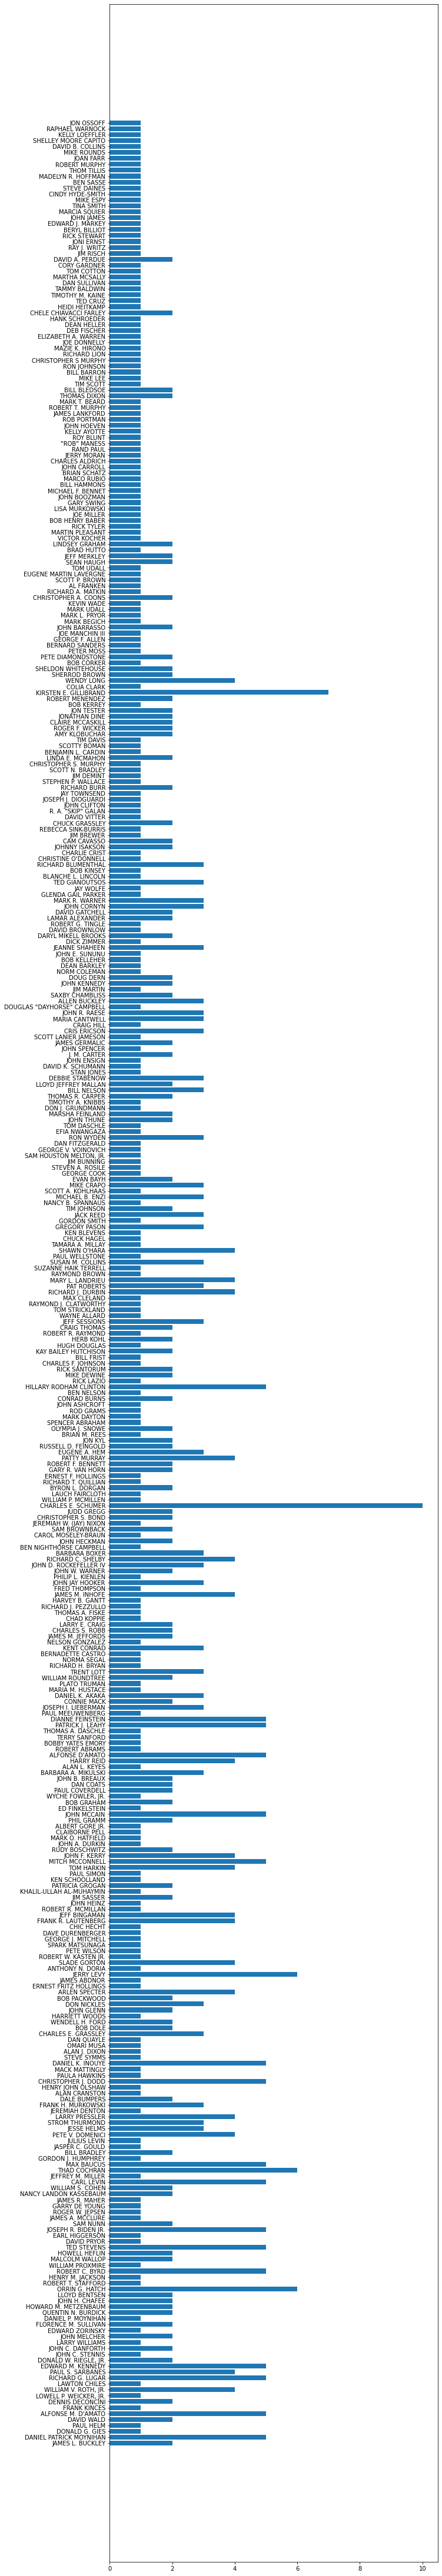

In [59]:
# Have to say that Charles E. Schumer has it figured out.

plt.figure(figsize=(10,80))
plt.barh(congress_election_df['Candidate'],congress_election_df["Election_Count" ])
plt.show()

Also ploting a box and wiskers to see outliers in more definition. It seems that that election results are all over the place. The more notable outlier is 10 times.

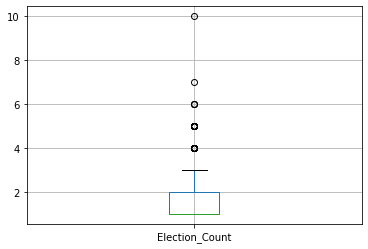

In [60]:
boxplot = congress_election_df.boxplot(column=['Election_Count'])
boxplot.plot()

plt.show()

Step 6: Now we need to removed the outliers. I believe 95 percentile should be sufficient to be removed. That way the mean can seem more normal.

In [61]:

#getting the quantile for first q1 and q3 then staying at the margins considered an outlier
#The quantile can be adjusted to what I believe is an outlier. 
#currently I set it to .10 and .95

#drop all null values before 
Above_Q1 = np.quantile(congress_election_df['Election_Count'],0.10)
Below_Q3 = np.quantile(congress_election_df['Election_Count'],0.95)

#values that were calculated to be in the outliers category
print("Below {0} and Above {1}".format(Above_Q1, Below_Q3))
congress_election_data_reduced_outliers =  congress_election_df[(congress_election_df['Election_Count'] >= Above_Q1) & (congress_election_df['Election_Count'] <= Below_Q3)].copy()





Below 1.0 and Above 5.0


Removing up to 95 quantile leaves the outlier at 5. This seems more mangeable. Its safe to say that the average stands between 1 and 2. 

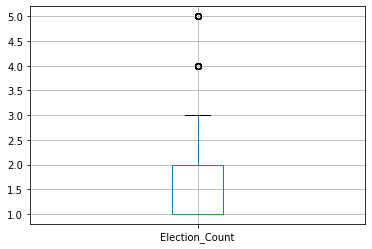

In [62]:
boxplot = congress_election_data_reduced_outliers.boxplot(column=['Election_Count'])
boxplot.plot()

plt.show()

# Felipe Castillo
# Data Preparation
# Milestone 4
# 2/18/2022



In [18]:
def wikipedia_representatives():
    
    #Url
    wiki_url = 'https://en.wikipedia.org/wiki/List_of_current_members_of_the_United_States_House_of_Representatives'
    
    #response can fail, adding a try catch for connectivity
    try:
        response = requests.get(wiki_url)
        #using wikipedia packe to pull table
        html = wp.page('List of current members of the United States House of Representatives').html().encode("UTF-8")
        
        #pull exact table with congress information
        df_html = pd.read_html(html)[7]

        df_wiki = pd.DataFrame(df_html)
        
        return df_wiki

    except:
        print("Could note retieve website.")

In [19]:

#mapping function to wiki_df
wiki_df = wikipedia_representatives()

In [20]:
#checking null, adjustement names to be made, 
wiki_df.head(20)

,District,Member,Party,Party.1,Prior experience,Education,Assumed office,Residence,Born[2]
0,Alabama 1,Jerry Carl,NaN,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,(age 63)
1,Alabama 2,Barry Moore,NaN,Republican,Alabama House of Representatives,Enterprise State Community College (AS)Auburn ...,2021,Enterprise,(age 55)
2,Alabama 3,Mike Rogers,NaN,Republican,Calhoun County CommissionerAlabama House of Re...,"Jacksonville State University (BA, MPA)Birming...",2003,Anniston[3],(age 63)
3,Alabama 4,Robert Aderholt,NaN,Republican,Haleyville Municipal Judge,University of North AlabamaBirminghamâSouthe...,1997,Haleyville,(age 56)
4,Alabama 5,Mo Brooks,NaN,Republican,Alabama House of RepresentativesMadison County...,Duke University (BA)University of Alabama (JD),2011,Huntsville,(age 67)
5,Alabama 6,Gary Palmer,NaN,Republican,Policy analyst,University of Alabama (BS),2015,Hoover,(age 67)
6,Alabama 7,Terri Sewell,NaN,Democratic,Attorney,"Princeton University (BA)St Hilda's College, O...",2011,Birmingham,(age 57)
7,Alaska at-large,Don Young,NaN,Republican,Ship captainMayor of Fort YukonAlaska SenateAl...,"Yuba CollegeCalifornia State University, Chico...",1973 (special),Fort Yukon,(age 88)
8,Arizona 1,Tom O'Halleran,NaN,Democratic,Arizona Senate,Lewis UniversityDePaul University,2017,Sedona,(age 76)
9,Arizona 2,Ann Kirkpatrick,NaN,Democratic,U.S. HouseArizona House of Representatives,"University of Arizona (BA, JD)",2019,Tucson,(age 71)


In [21]:
#Updating some header names 
#making them easier to call

#swapped party1 and poli_party , party will be removed due to null values

header_name = ['District','Candidate','Party1','Poli_Party','Experience','Cand_Education','Start_Date','Residence','Age']


#Take each name in heards and replace headrs in df 
wiki_df.columns = [x for x in header_name]



In [22]:
# Removing Null Feild party one
# All Values in the data set where null

#droping null values for beetter reablity 

wiki_df.drop(columns=['Party1'],axis=1, inplace=True)


wiki_df.head()


,District,Candidate,Poli_Party,Experience,Cand_Education,Start_Date,Residence,Age
0,Alabama 1,Jerry Carl,Republican,Mobile County Commission,Florida Gateway College,2021,Mobile,(age 63)
1,Alabama 2,Barry Moore,Republican,Alabama House of Representatives,Enterprise State Community College (AS)Auburn ...,2021,Enterprise,(age 55)
2,Alabama 3,Mike Rogers,Republican,Calhoun County CommissionerAlabama House of Re...,"Jacksonville State University (BA, MPA)Birming...",2003,Anniston[3],(age 63)
3,Alabama 4,Robert Aderholt,Republican,Haleyville Municipal Judge,University of North AlabamaBirminghamâSouthe...,1997,Haleyville,(age 56)
4,Alabama 5,Mo Brooks,Republican,Alabama House of RepresentativesMadison County...,Duke University (BA)University of Alabama (JD),2011,Huntsville,(age 67)


In [23]:
# Age is saved as (age 56) in data feild taking 

#setting empty arry for age values
filter_ages = []
#taking all age
for age in wiki_df['Age']:
    #step -------- taking regex and cutting out age and ()
    n=re.findall('[0-9]+',age)
    #Returned allo values 
    for number in n:
        filter_ages.append(number)

In [24]:
unique_age = []
for age in filter_ages:
    if age not in unique_age and age.isnumeric():
        unique_age.append(age)
print(unique_age)

['63', '55', '56', '67', '57', '88', '76', '71', '74', '59', '42', '51', '65', '54', '61', '58', '77', '70', '35', '69', '81', '75', '41', '45', '79', '52', '44', '68', '85', '47', '49', '53', '80', '83', '48', '64', '66', '43', '60', '33', '37', '73', '78', '39', '34', '72', '50', '62', '38', '84', '40', '82', '46', '32', '26', '86']


In [25]:
# find words with their count


#setting dic to empty 
agedic = {}
# Getting unique day values
for age in unique_age:
    #setting a current age values
    current_age = age
    count = 0
    #if an occurance of the unique value add counter
    for age_can in filter_ages:
        if(current_age ==  age_can):
            count = count + 1
            agedic[age] = count
#storing values in dictionary now I can map the data
        
print(agedic)

{'63': 15, '55': 14, '56': 14, '67': 13, '57': 14, '88': 1, '76': 5, '71': 12, '74': 13, '59': 14, '42': 6, '51': 9, '65': 13, '54': 5, '61': 13, '58': 18, '77': 5, '70': 9, '35': 3, '69': 10, '81': 3, '75': 7, '41': 8, '45': 12, '79': 3, '52': 10, '44': 5, '68': 16, '85': 2, '47': 6, '49': 6, '53': 8, '80': 4, '83': 1, '48': 12, '64': 9, '66': 12, '43': 11, '60': 17, '33': 2, '37': 8, '73': 8, '78': 2, '39': 5, '34': 5, '72': 6, '50': 11, '62': 10, '38': 5, '84': 1, '40': 2, '82': 1, '46': 6, '32': 1, '26': 1, '86': 1}


In [26]:
#Argument takes in dictionary and returns a list of tuples in order. 
#the data and futrue graphs will be more readable.
sorted_dictionary = sorted(agedic.items(), key=lambda x: x)

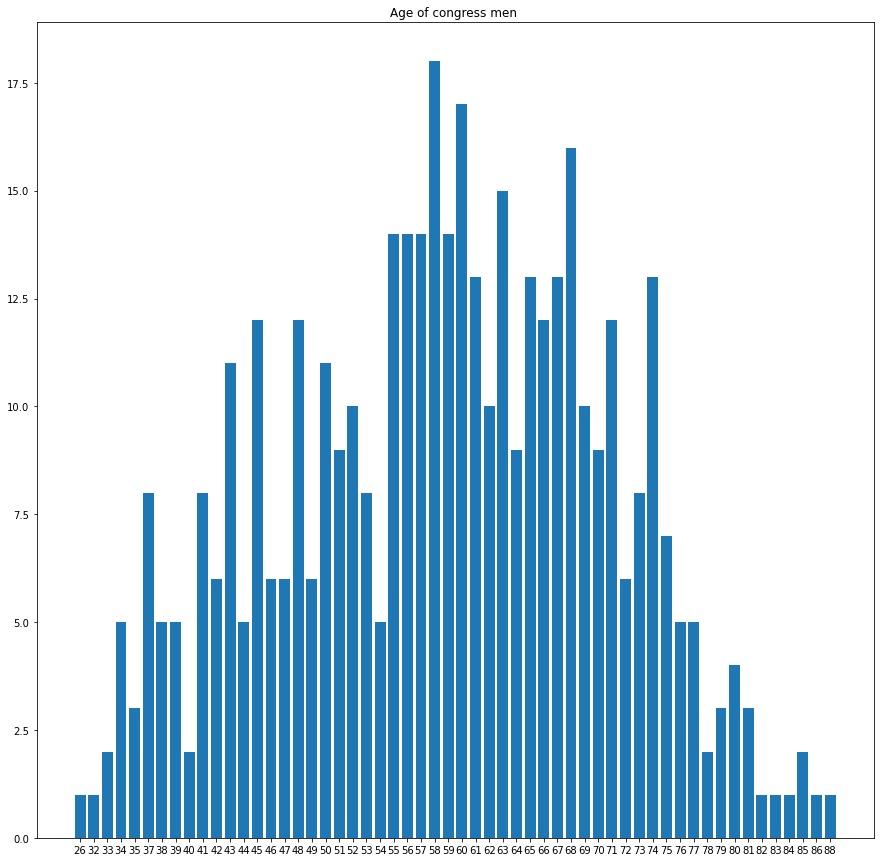

In [27]:
#sorted_dictionary 
#unpackinging sorted 
#seems like an amazing task to be 88 and in office
#At 23  I was still in school lol!



plt.figure(figsize=(15, 15))
plt.title("Age of congress men ")
plt.bar(*zip(*sorted_dictionary))
plt.show()


In [28]:
# State dictionary copied from git hub on states 
#will be used to refactor state intailies as a way to keep a counter
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

In [29]:

state_list = []
for district in wiki_df['District']:
    # Looking at the first word in the var value example alabama 1 will only look at alabama excluding anything after the space 
    state =re.findall('[^\s]+',district)
    
    #checking state is in state dictionary 
    if (state[0] in states.values()):
        
        #looking through each item in dictionary 
        for key, value in states.items():
            #checking that state is in dictinary
            if state[0] == value:
    
                #adding to list
                state_list.append(key)
            
# The list returned contains each district that is inserted by a state value 
#each value after that is considered to be wrong
                
print(len(state_list))
    

364


In [30]:
# There are 71 values that are no in state number format
int(wiki_df.shape[0]-len(state_list))  

71

# Felipe Castillo
# Data Preparation
# Milestone 5
# 03/04/2022

In [384]:
import sqlite3 as db
import sqlalchemy as sqla

In [730]:
#wiki_df.head(4)

In [731]:
#senate_76_20_dfRowsDF.head(4)

In [732]:
#df_congress_api.head(5)

In [388]:
df_congress_api.columns

Index(['candidate_name', 'state', 'total_pac_money', 'total_individual',
       'total_contributions', 'begin_cash', 'end_cash', 'total_refunds',
       'debts_owed', 'date'],
      dtype='object')

In [389]:
#connceting to sqlite
#mydata.sqlite
#making a data base 
con = sqlite3.connect("House_Representatives.db")

In [390]:
con.commit()

In [392]:
#making congress api table
df_congress_api.to_sql(name='congress_api', con=con)

In [214]:
#making sentate csv table 
senate_76_20_dfRowsDF.to_sql(name='senate_csv', con=con)

In [215]:
#making house rep wiki table
wiki_df.to_sql(name='House_Rep_Wiki', con=con)

In [195]:
#con.execute(query)

In [216]:
conn = sqlite3.connect('House_Representatives.db')

In [217]:
#establishing cursor for data base
cursor = conn.cursor()

In [230]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

In [231]:
#two tables inside db
# making sure all tables are create 
print(cursor.fetchall())

[('congress_api',), ('senate_csv',), ('House_Rep_Wiki',)]


In [480]:
#priting api table make sure it works 
print('\n---------DATA ROWS For API Data Set-----------:')
data=cursor.execute('''SELECT * from congress_api''')
#for i in data:
    #print(i)


---------DATA ROWS For API Data Set-----------:


In [232]:

#print senate data table
print('\n---------DATA ROWS For CSV  Data Set-----------:')
data=cursor.execute('''SELECT * from senate_csv''')
#for i in data:
 #   print(i)

In [479]:
#printing wiki table 
print('\n---------DATA ROWS For Website  Data Set-----------:')
data=cursor.execute('''SELECT * from House_Rep_Wiki''')
#for i in data:
    #print(i)


---------DATA ROWS For Website  Data Set-----------:


First graph will include data from three different data sets. The graph will take the amount of congress men mentioned in each data source. Mentioned and none mentioned will be accounted for and distributed in a pie chart. This is important to show the different people across data sets.

Step 1: Getting data from all 3 tables

In [297]:
#combinding all tables into one larger table
data_combind=cursor.execute('''select candidate_name,state,total_pac_money from congress_api union all select candidate,state,state_fips from senate_csv union all select Candidate,Poli_Party, Age from House_Rep_Wiki''')

Step 2: storing only names 

In [309]:
#storing names
names_combind_array = []

for i in data_combind:
    #checking that there is no numeric values in data 
    if(str(i[0]).isnumeric() == False):
        #only allowing names to pass
        names_combind_array.append(str(i[0]))
        
#print(names_combind_array)

Step 3: Making sure names are only accounted once, if felipe then I can insert another Felipe

In [299]:
#making a unique reference name
unique_names = []

for name in names_combind_array:
    #if the uniques column doesn have names
    if name not in unique_names:
        #append names not in unique table
        unique_names.append(name)
#print(unique_names)

Step 4: Adding a count for names the appear more then once.

In [310]:
# find the names in the 3 data sources
# this is important to see if the candiate is mentioned in all data set
#this will be accomplish with contain

#setting dic to empty 
namedic = {}

# Getting uique day values
for name in unique_names:
    
    #setting a current age values
    current_name = name
    count = 0
    #if an occurance of the unique value add counter
    for j in names_combind_array:
        #Checking to is if unique value contains pointed values
        #adding counter to time metioned
        if(j in current_name):
            count = count + 1
    # Making sure there are no null values
    if(name != ''):
        namedic[name] = count
        
    
        
#print(namedic)
        

Step 5: Checking if the values in dictionary contains names and if value is greater then one. This mean the name was reapted in a different data sources.

In [301]:

#stroing repeated and not repeated balues
names_dataset_dic ={}

#iterating key and value of the names counter 
for key, value in namedic.items():
    #if the person is mention more then 1 time it means they are share names in data sets
    if int(value) > 1:
        #setting a counter inside of dictionary
        #if the value is greater then one the counter of repated increase by one
        names_dataset_dic["Repeated"] =  names_dataset_dic.get("Repeated", 0) + 1
    else:
        #the value is not repeated the value increase by one 
         names_dataset_dic["Not Repeated"] =  names_dataset_dic.get("Not Repeated", 0) + 1
        
print(names_dataset_dic)       


{'Repeated': 189, 'Not Repeated': 776}


Step 6: Plot dictionary into pie char

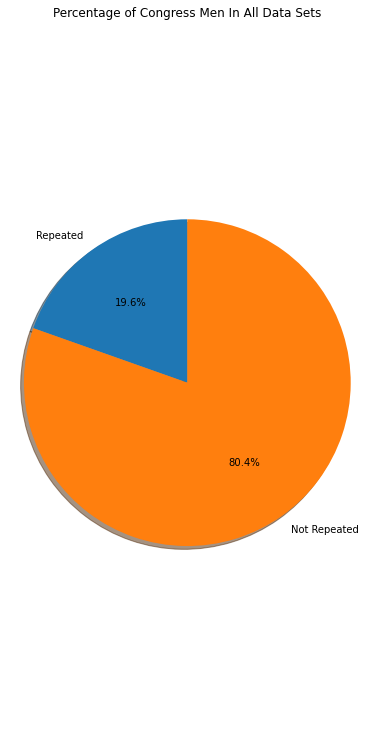

In [302]:
# This means all data sets mention the congress men by name
# This also means that a percntage have been both sentors and house of represnetatives
labels = names_dataset_dic.keys()

#setting plot figure size
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes((0,0,.5,1))
#setting name
plt.title("Percentage of Congress Men In All Data Sets")
#unpacking values in pie
ax.pie(names_dataset_dic.values(),  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  
plt.show()

Second table will contain two different data source. This table will see if the data is objective or if it is fair to all parties. If its only democratic information, an assessment can be made for republican.

Step 1: Taking data from senate csv and house wiki

In [723]:

# checking two tables that mention political parties
#seeing if the data is objective or if its leaning towards one side over the other
data_combind=cursor.execute('''select candidate,political_parties,state_fips from senate_csv  union all select Candidate,Poli_Party, Age from House_Rep_Wiki''')

In [729]:
#arrange names to understand them better
#currently some names are in reverse state 
#for personal use none graph purposes 
# being used to see the names in first name, last name bases
#example Felipe Castillo, instead of Castillo ,Felipe 


namespartiesList = []

print("----Personal Use-------")
for obj in data_combind:
    current_name = obj[0]
    print("______",current_name)
    
    first_name = ''
    last_name = ''
    for name in data_combind:
        if "," in name[0]:
            temp_f_name = name[0].split(',')[1]
            last_name = name[0].split(',')[0]
            if (' '  in temp_f_name) == True :
                first_name = temp_f_name.split(' ')[1]
            
            else:
                first_name = temp_f_name
            
            
            namespartiesList.append(first_name +" "+last_name)
            
#print(namespartiesList)      
        
        
                

Step 2: Check  and store the ammount of occurences per party. In this case we care about main parties democrat and repblican.

In [727]:

#stored rublicans
party_aff_r = []
#store democrats
party_aff_d = []

#Two tables are combind in one
#iterating throught tables one is lower case and the other is upper case
for obj in data_combind:
    print(obj[1])
    #checking if data is this or that
    if(obj[1] == 'Republican' or obj[1] == 'REPUBLICAN' ):
        #print('----r----' , obj[0])
        #appending as r
        party_aff_r.append('R')
        
    #checking if data is this or that
    if(obj[1] == 'Democratic'or obj[1] == 'DEMOCRAT'):
        #print('----d---',obj[0])
        #appending d
        party_aff_d.append('D')


Step: 3 combinded occurence into one array by count.

In [725]:
#both arrays will be combind into one 
poli_compare_list = []
#append the aount of r in party aff r
poli_compare_list.append(len(party_aff_r))
#append the aount of d in party aff d
poli_compare_list.append(len(party_aff_d))


Step: 4 plot bar graph.

<BarContainer object of 2 artists>

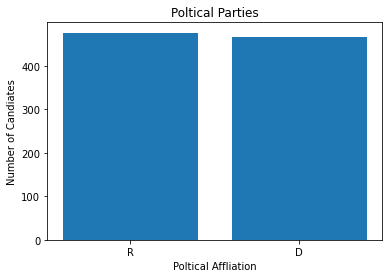

In [728]:
#setting labels for bar graph
labels = ['R','D']
plt.title("Poltical Parties")
plt.xlabel("Poltical Affliation")
plt.ylabel("Number of Candiates")

#pushing labels and combined array
plt.bar(labels, poli_compare_list)

#looks very close but there is more republicans data 

Table 3 only looks at congress api table to get a better understanding of political contributions.

Step 1: Getting and store total_contributions

In [742]:
candidate_finance = []

#taking api information total contributions
data=cursor.execute('''SELECT candidate_name,total_contributions from congress_api''')
for i in data:
    #appending into and array
    candidate_finance.append(i[1])
    

Step 2: Converting it into a np array for better handling

In [318]:
#converting it into a np array 
cand_finance = np.array(candidate_finance)

Step 3: Plot Histogram

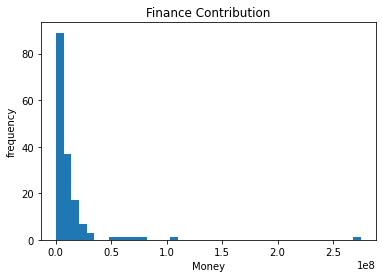

In [324]:
#Made a historgram of financal cntribution for congress men 
#has an obvious outlier
plt.title("Finance Contribution")
plt.hist(cand_finance, bins=40)  
plt.ylabel('frequency')
plt.xlabel('Money');

The fourth table will show the total amount contribution made to each state.

Step 1: Getting congress api table.

In [734]:
#Seleting total contributions
data=cursor.execute('''SELECT state,total_contributions from congress_api''')


Step 2: Storing state and contributions to its own list.

In [735]:
# unpacking data into two separte list
#x contians state, y contains total_contributions
x,y = zip(*data)

stateList = list(x)
finList =  list(y)


Step: 3 Add all of the state contributions instance to one state. Example if there are 5 sentors from tx it will take their contributions and total it all to tx.

In [443]:

#will contain total fincail information for sate
state_fin_dic ={}


#unpacking into state and finances 
for state,finances in data:
    #will store total finances by state
    temp_finances = 0
    #for each state it will look to see if state has a finacial record
    for i in range(len(stateList)):
        #if the same state has record 
        if(stateList[i] == state):
            #add the last occurence of finances + the current one
            temp_finances = temp_finances + float(finList[i])
    #store total by state in dictionary
    state_fin_dic[state] = temp_finances
print(state_fin_dic)
        
        
        


{'KY': 89495385.83, 'LA': 17301008.0, 'TX': 47223913.21, 'AR': 27159344.0, 'KS': 6463693.0, 'MS': 6618097.0, 'NC': 66657740.760000005, 'CA': 38912034.97, 'CO': 39721376.89, 'VA': 48977819.85, 'MA': 53322423.220000006, 'TN': 20157641.04, 'MI': 84138015.13, 'SC': 124339631.64, 'AK': 13987695.0, 'MD': 15134285.36, 'WV': 7664254.0, 'OH': 73378921.46, 'WI': 7942978.05, 'UT': 8470978.41, 'NV': 48347559.0, 'MO': 45947810.0, 'NY': 48134133.0, 'IA': 38766710.519999996, 'FL': 71356708.71000001, 'PA': 69992346.17, 'IL': 52062810.94, 'WA': 22264900.0, 'AZ': 106036647.24, 'MT': 37945745.09, 'NE': 5965810.0, 'CT': 26768720.0, 'NJ': 12677880.0, 'MN': 30415006.310000002, 'ND': 32871365.41, 'NM': 4672290.0, None: 274759008.0, 'SD': 24563752.0, 'GA': 152847864.96, 'NH': 2825880.0, 'IN': 17925880.869999997, 'AL': 3532664.0, 'OR': 10594701.84, 'WY': 5391614.77, 'ME': 25685278.84}


Step 4: Plot line graph

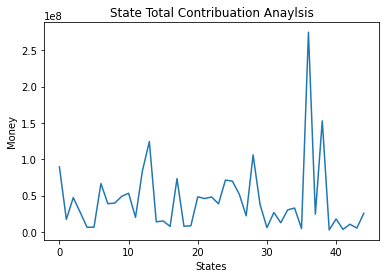

In [477]:
#setting a line graph to see total contributions comaprision 
plt.title("State Total Contribuation Anaylsis")
plt.ylabel("Money")
plt.xlabel("States")
plt.plot(list(state_fin_dic.values()))


Table 5 takes in one table and checks if there is an anomoly in years and total votes.

Step 1: Take year and votes from sentate table

In [740]:
#seeing if there is an anomoly for years and candidate votes
#perhapes some years peopple vote more then others 
data=cursor.execute('''select year,candidatevotes from senate_csv ''')

Step 2: Unpack and plot scatter plot 

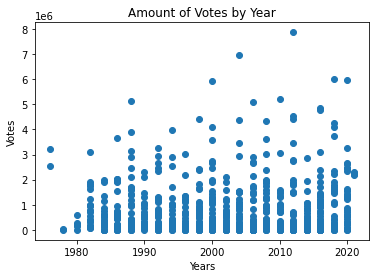

In [741]:
#unpacking year, votes 
x,y = zip(*data)
plt.title("Amount of Votes by Year")
plt.xlabel("Years")
plt.ylabel("Votes")
plt.scatter(x, y)



# Summary

Coming into this class, I didn’t know much about data wrangling. As a software engineer, I am responsible for data manipulation and knowing how to handle small amounts of data. However, I have never had to dig through all the data as I did at school. At the start, it was a little over whelming not knowing which graph to use or which package was best for handling issues. 
To complete my project, I had to take what I learned each week and apply it back to my milestone. The data showed that Congress gets a lot of money in contributions. Most of my questions I had were answered. There are some congress men that have been in office for longer than I have been alive. Overall, what made this project easier is that I am passionate about politics.

In this class I learned to handle large amounts of data. I also learned to make sense out of the data.  I never worked with SQLite even though I work with SQL server. It was so different! I never imagined that I could run SQL without having to set up a server and the IDE. SQLite became one of my favorite methods to use SQL. I also was introduced to beautiful soup. Although, it’s not my favorite, I know how to use it. 


Honestly, the ethical implications frighten me more now. How would anyone know if I manipulated the data to my own will? When you work with data, you have power to shape it to tell a story. More than ever it’s important to be honest and to be careful when working with data. When working with a large amount of data, it is easy to lose yourself and increase the chances of errors. During this class, I read a lot about ethical issues. It doesn’t seem like a lot of companies follow them. I know that I will follow the ethics provided to me.


Overall, I have had a blast in this class. No, I didn’t like the long homework hours just like an athlete doesn’t like training. Now, I feel like I can actually do a lot! In fact, I have been using some of the stuff I am learning in school at work. The class students were smart, and I learned a lot. I ended up coding more in this class which I am grateful. Some say school is a waste of time. Now, you can learn the same technology on Udemy for pennies on the dollar. In this case, I don’t feel like I wasted my time. It was well worth it, and I recommend it to anyone that is serious about data science.
